## Quadrature Methods Implementation HomeWork

#### Done by : MERIEM NAJI & WISSAL BELHORMA

##### Question 8):
  We have here that $ \mathcal{X} = [a,b] $, so to change the interval into $[-1,1]$ we can do the following transformation:
$$ \phi: u \rightarrow \frac{1}{2}(b - a)u + \frac{1}{2}(b + a) $$


#### Question 9)  
A function that approximates the integral of a function $ f $ over $[a, b]$:

We consider the following inputs:

$$
\begin{align*}
f & : \text{function to integrate} \\
a & : \text{lower bound of integration} \\
b & : \text{upper bound of integration} \\
\text{nodes} & : \text{list of nodes} \\
\text{weights} & : \text{list of weights}
\end{align*}
$$


On prend pour test function $f: x \rightarrow sin(x) $ et on considère le polynôme de Legendre d'ordre 3 : $$ P_3(x) = \frac{1}{2}(5x^3 - 3x) $$


In [1]:
import numpy as np
from scipy.special import eval_legendre
from scipy.integrate import quad
from scipy.special import roots_legendre, roots_hermite, roots_laguerre


def gauss_legendre_simple(f, a, b, nodes, weights):

    # Map the interval [a,b] to [-1,1]
    def phi(x):
        return 0.5*(b-a)*x + 0.5*(b+a)

    # Map the integral to the interval [-1,1]
    integral = 0.5*(b-a)*sum(w*f(phi(x)) for x, w in zip(nodes, weights))

    return integral

In [2]:
def test(x):

    return np.sin(x)

In [4]:
roots, weights = roots_legendre(3)

approx_result1 = gauss_legendre_simple(test, 0, np.pi, roots, weights)
exact_integral1, error = quad(test, 0, np.pi)
error1 = np.abs(approx_result1-exact_integral1)

print("The approximated integral in [0 , pi] with gauss legendre ", approx_result1)
print("The exact integral in [0 , pi] obtained with quad function ", exact_integral1)
print("The error of the gauss legendre method is",error1)



The approximated integral in [0 , pi] with gauss legendre  2.0013889136077427
The exact integral in [0 , pi] obtained with quad function  2.0
The error of the gauss legendre method is 0.0013889136077427366


#### Question 10)
the composite rule of Gauss-Legendre over $M$ sub-intervals of $[a, b]$ , we consider the following inputs:
$$
\begin{align*}
f & : \text{function to integrate} \\
n & : \text{number of nodes} \\
a & : \text{lower bound of integration} \\
b & : \text{upper bound of integration} \\
M & : \text{number of subintervals} \\
\end{align*}
$$


In [5]:
def gauss_legendre(f,n ,M , a , b) :


    integral = 0
    nodes , weights = np.polynomial.legendre.leggauss(n)

    for i in range(0, M):
        integral += gauss_legendre_simple(f, a+i*(b-a)/M, a+(i+1)*(b-a)/M, nodes, weights)



    return integral

In [6]:
a = 0
b = np.pi
n = 2
M = 10
approx_result2 = gauss_legendre(test,n,M,a,b)
exact_integral2, error = quad(test, a, b)
error2=np.abs(approx_result2-exact_integral2)

print(f"Approximated Integral in [{a},{b}] with composite gauss_legendre :", approx_result2)
print(f"The exact integral in [{a},{b}] obtained with quad:", exact_integral2)
print("The error of the gauss legendre method is",error2)


Approximated Integral in [0,3.141592653589793] with composite gauss_legendre : 1.9999954761529581
The exact integral in [0,3.141592653589793] obtained with quad: 2.0
The error of the gauss legendre method is 4.523847041859597e-06


### Remark


 we notice that  the composite method is much more precise than the simple one

#### Question 11)
we will implement an identical function with a vectorized implementation :
$$
\begin{align*}
f & : \text{function to integrate} \\
n & : \text{number of nodes} \\
a & : \text{lower bound of integration} \\
b & : \text{upper bound of integration} \\
M & : \text{number of subintervals} \\
\end{align*}
$$



In [7]:

def gauss_legendre_vectorized(f, n, M, a, b):

    roots, weights = roots_legendre(n)

    midpoint = (a + (np.arange(M)) * ((b-a)/M) + a + (np.arange(M)+1) * ((b-a)/M)) / 2

    midpoint = np.tile(midpoint, (n, 1))

    matrix = midpoint.T

    integral = np.sum(np.sum(f(np.full((M,n) , (b-a) / (2*M))*roots + matrix) * weights, axis=1))*(b-a)/(2*M)



    return integral




In [8]:
print("The approximated integral value with gauss_legendre_vectorized ", gauss_legendre_vectorized(test,2,10,0,np.pi))

The approximated integral value with gauss_legendre_vectorized  1.999995476152958


#### Question 12)
Visualisation of the integration error of $\int_{2}^{5} \frac{1}{x} \, dx $ as a function of both $n$ and $M$


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

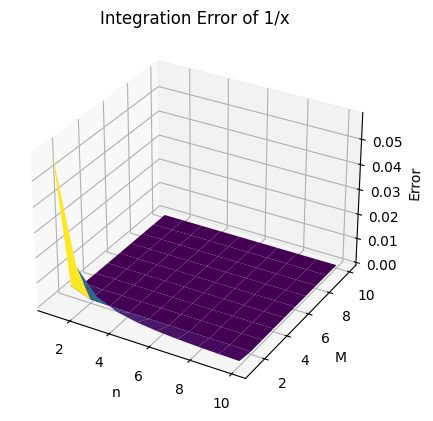

In [10]:


def test(x):
    return 1/x

n_values = np.arange(1,11)   # Range of n values
M_values = np.arange(1,11)  # Range of M values

# Initialize arrays to store integration errors
errors = np.zeros((len(n_values), len(M_values)))

a = 2
b = 5
# Calculate integration errors for all combinations of n and M
for i, n in enumerate(n_values):
    for j, M in enumerate(M_values):
        approx_result = gauss_legendre(test, n, M, a, b)
        exact_integral, _ = quad(test, a, b)
        errors[i, j] = np.abs(approx_result - exact_integral)

# Create 3D plot
N, M = np.meshgrid(n_values, M_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, M, errors, cmap='viridis')

# Set labels and title
ax.set_xlabel('n')
ax.set_ylabel('M')
ax.set_zlabel('Error')
ax.set_title('Integration Error of 1/x')

plt.show()

#### Question 13)

A function that computes the following composite trapezoidal rule :
$$ \frac{h}{2} \left( f(a) + 2 \sum_{j=1}^{M-1} f(a_j) + f(b) \right) $$


In [23]:
def trapezoidal(f, M, a, b):

    sum = 0
    h = (b-a)/M
    for i in range(M):
        a_i= a + i*h
        sum += f(a_i)
    sum = h/2*(f(a) + f(b) + 2*sum)
    return sum


##### Comparaison of the integration error with the Gauss-Legendre method :

In [28]:
f = lambda x: 1/x
a = 2
b = 5

In [24]:
def integration_error(f, M, a, b, method):
    if method == 'trapezoidal':
        I_trap = trapezoidal(f, M, a, b)
    elif method == 'gauss_legendre':
        I_gauss = gauss_legendre_vectorized(f, n, M, a, b)
    
    true_value, _ = quad(f, a, b)  # Compute true value using scipy's quad function
    if method == 'trapezoidal':
        error = abs(true_value - I_trap)
    elif method == 'gauss_legendre':
        error = abs(true_value - I_gauss)
    
    return error

In [29]:
n = 5  # Number of nodes for Gauss-Legendre
M_values = range(1, 101)  # M ranging from 1 to 100

errors_trapezoidal = []
errors_gauss_legendre = []

for M in M_values:
    error_trapezoidal = integration_error(f, M, 2, 5,'trapezoidal')
    error_gauss_legendre = integration_error(f, M, 2, 5,'gauss_legendre')

    errors_trapezoidal.append(error_trapezoidal)
    errors_gauss_legendre.append(error_gauss_legendre)



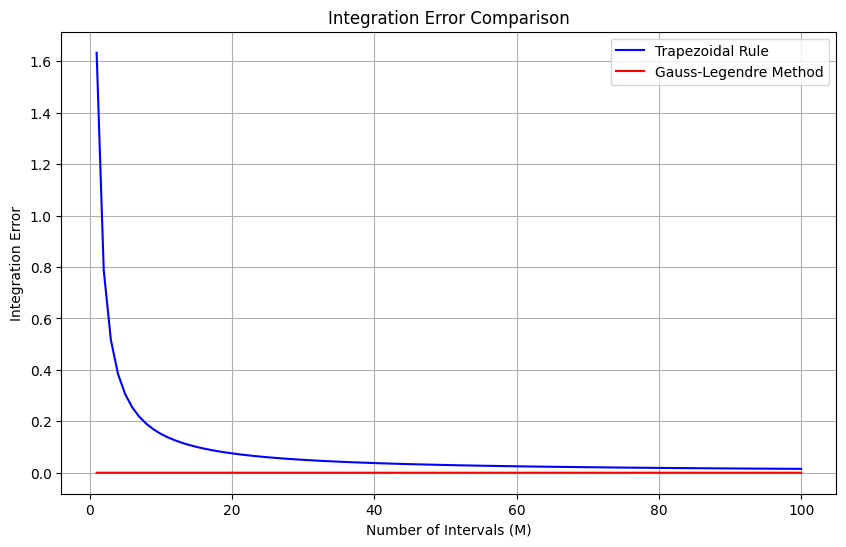

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(M_values, errors_trapezoidal, label='Trapezoidal Rule', color='blue')
plt.plot(M_values, errors_gauss_legendre, label='Gauss-Legendre Method', color='red')
plt.xlabel('Number of Intervals (M)')
plt.ylabel('Integration Error')
plt.title('Integration Error Comparison')
plt.legend()
plt.grid(True)
plt.show()

##### Conclusion :


We can see that the error of the trapezoidal method decreases slower than that of Gauss-Legendre quadrature as a function of $n$ . Also, for a fixed $n$, it maintains a constant value as function of $M$

#### Question 14)

Let $X \sim \mathcal{N}(0, 1)$ and $a \in \mathbb{R}$.

We know  that
$$
P[X \leq a] = \int_{-\infty}^{a} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \, dx
$$

We can write $P[X \leq a] = \int_{\mathbb{R}} w(x)f(x) \, dx$, with $X = \mathbb{R}$, $w : x \mapsto \sqrt{\frac{1}{2\pi}} e^{-\frac{x^2}{2}}$, and $f = \mathbb{1}_{]-\infty,a]}$.





In [43]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.special import roots_legendre, roots_laguerre
import scipy.stats

In [48]:
A = [0.5, 1.0, 1.5]  # Values of 'a'
N = range(2, 200)  
real_cdf = scipy.stats.norm.cdf(A)

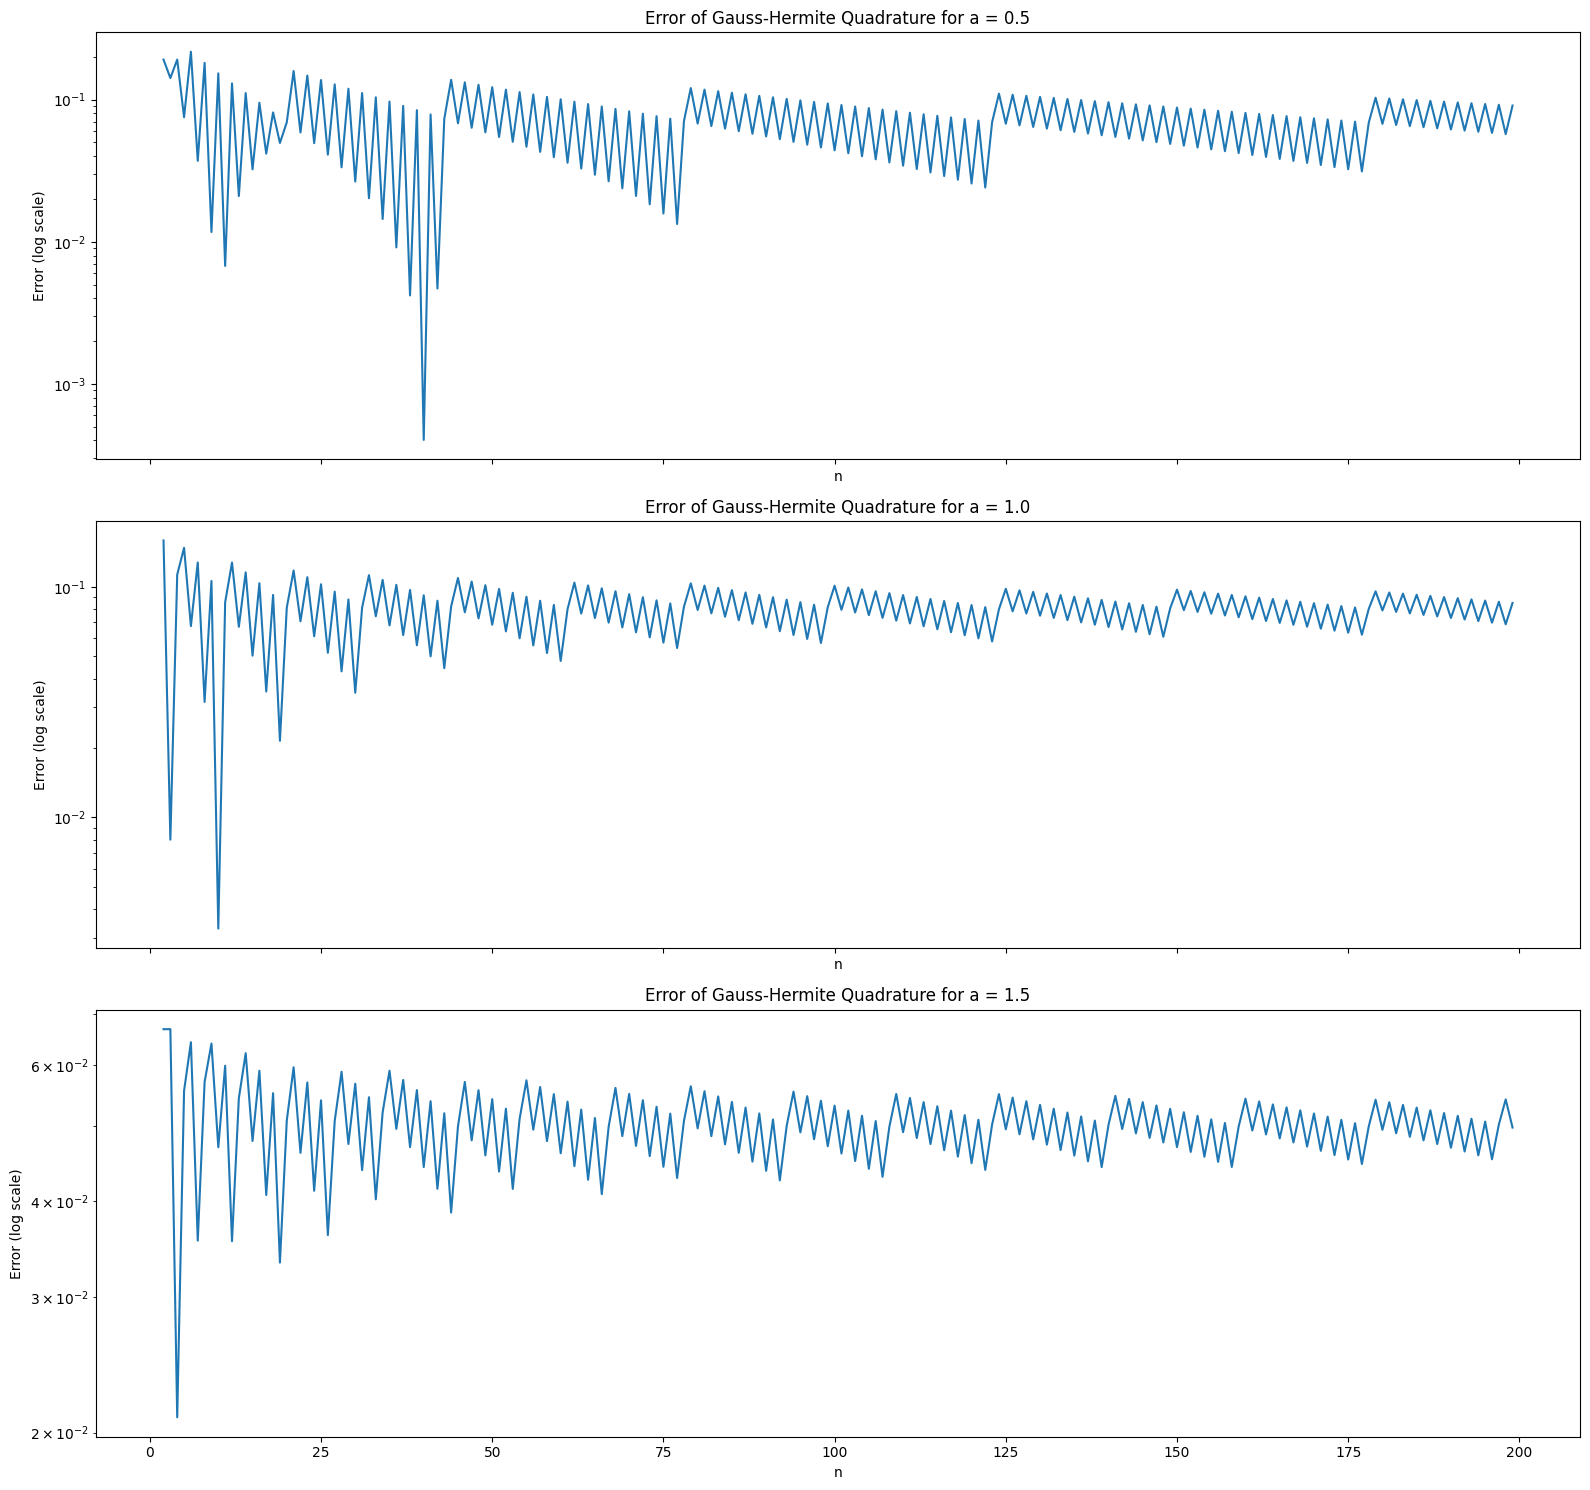

In [50]:
# Function for Gauss-Hermite Quadrature
def gauss_hermite_simple(a, n):
    nodes, weights = np.polynomial.hermite.hermgauss(n)
    approximation = sum(w for w in weights[nodes <= a]) / np.sqrt(np.pi)
    return approximation
# Plotting
fig, axs = plt.subplots(len(A), figsize=(16, 5*len(A)), sharex=True)

for i, a in enumerate(A):
    gaussian_error_a = []
    for n in N:
        cdf_a = gauss_hermite_simple(a, n)  # Change the function here based on the quadrature rule
        gaussian_error_a.append(np.abs(cdf_a - real_cdf[A.index(a)]))
    
    axs[i].plot(N, gaussian_error_a)
    axs[i].set_title(f'Error of Gauss-Hermite Quadrature for a = {a}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error (log scale)')
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\marye\AppData\Local\Temp\ipykernel_60064\3466948915.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  approximation = np.sum(w for w in weights[nodes <= a]) / np.sqrt(np.pi)


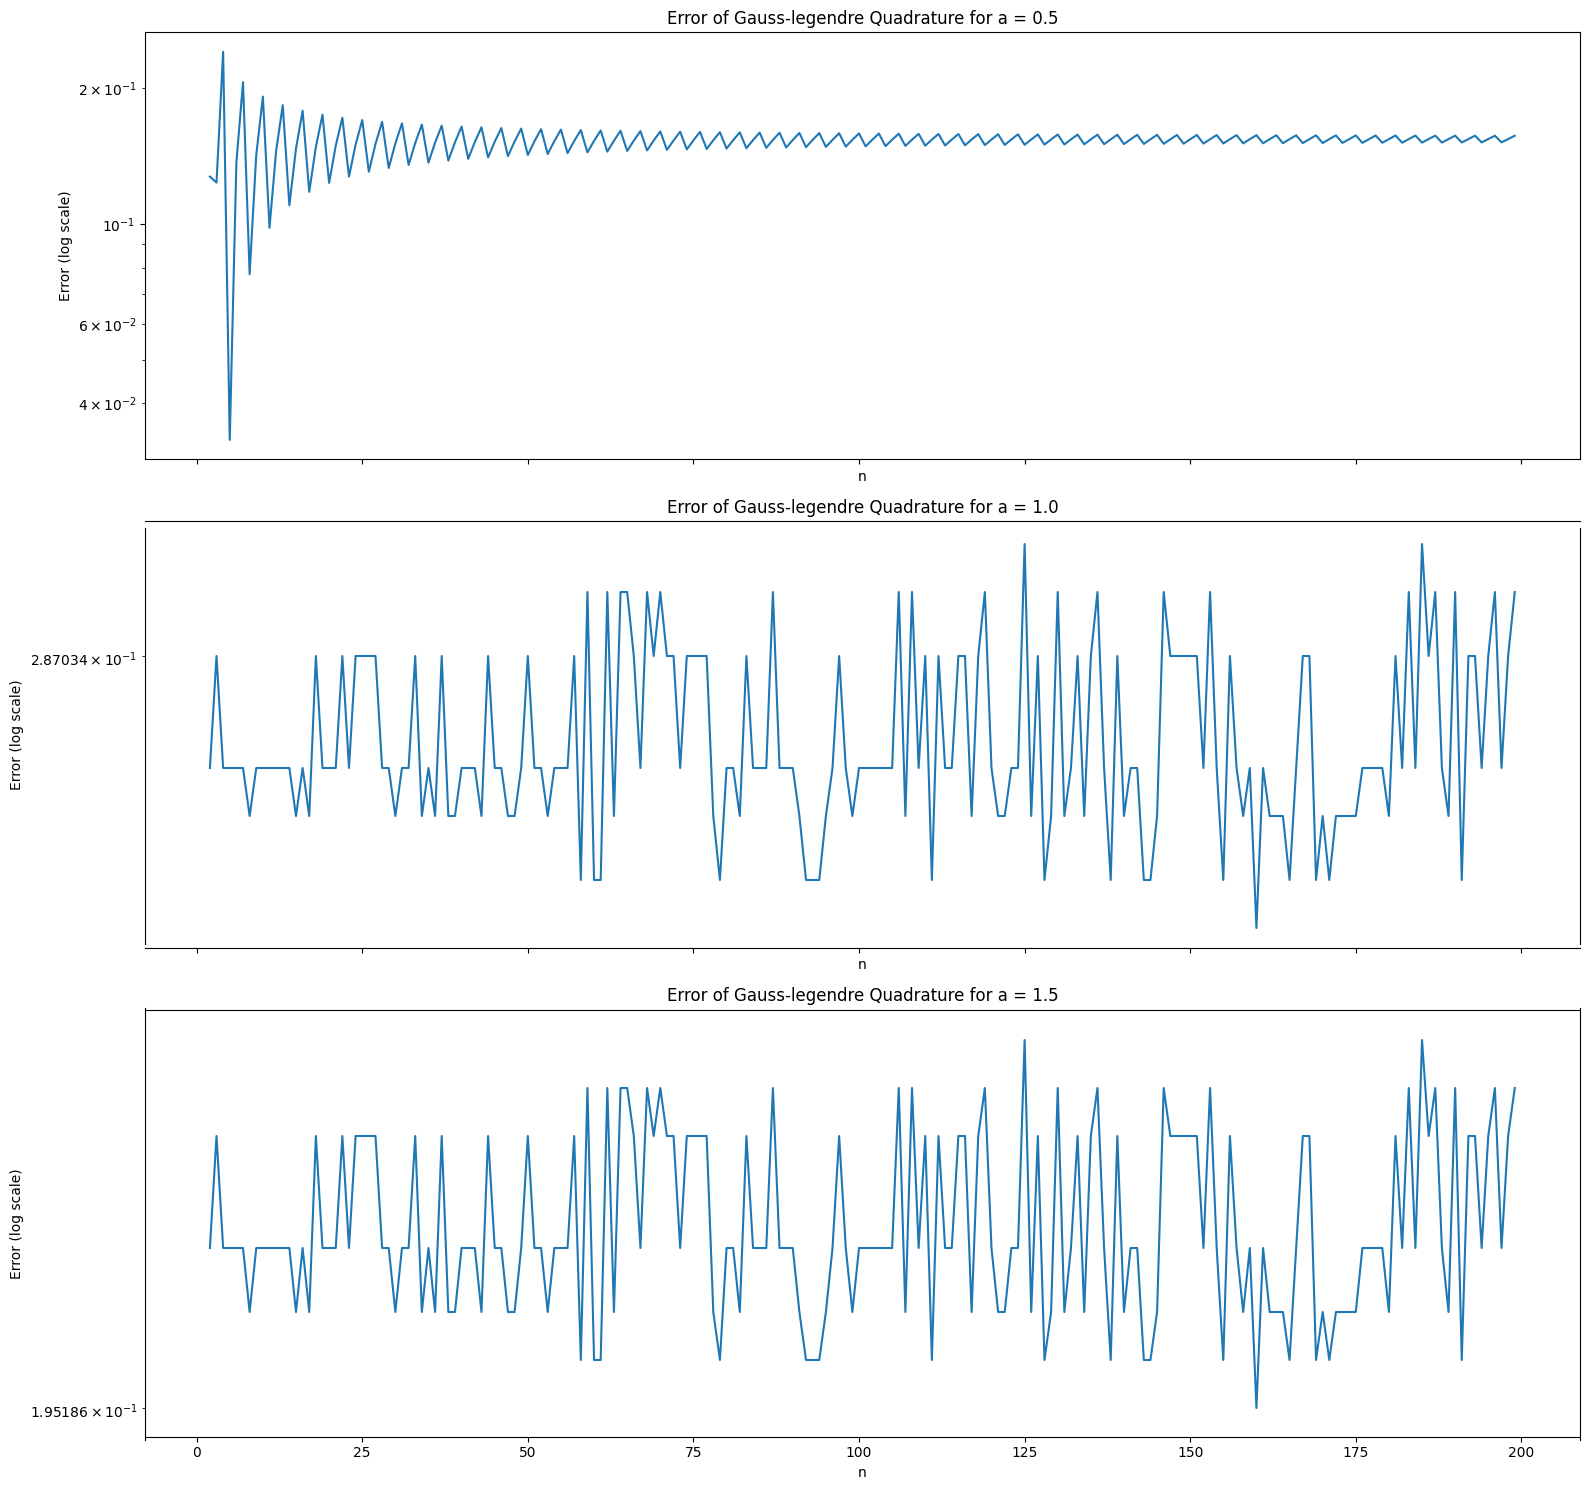

In [52]:
# Function for Gauss-Legendre Quadrature
def gauss_legendre_simple(a, n):
    nodes, weights = np.polynomial.legendre.leggauss(n)
    approximation = np.sum(w for w in weights[nodes <= a]) / np.sqrt(np.pi)

    return approximation
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(len(A), figsize=(16, 5*len(A)), sharex=True)

for i, a in enumerate(A):
    gaussian_error_a = []
    for n in N:
        cdf_a = gauss_legendre_simple(a, n)  # Change the function here based on the quadrature rule
        gaussian_error_a.append(np.abs(cdf_a - real_cdf[A.index(a)]))
    
    axs[i].plot(N, gaussian_error_a)
    axs[i].set_title(f'Error of Gauss-legendre Quadrature for a = {a}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error (log scale)')
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

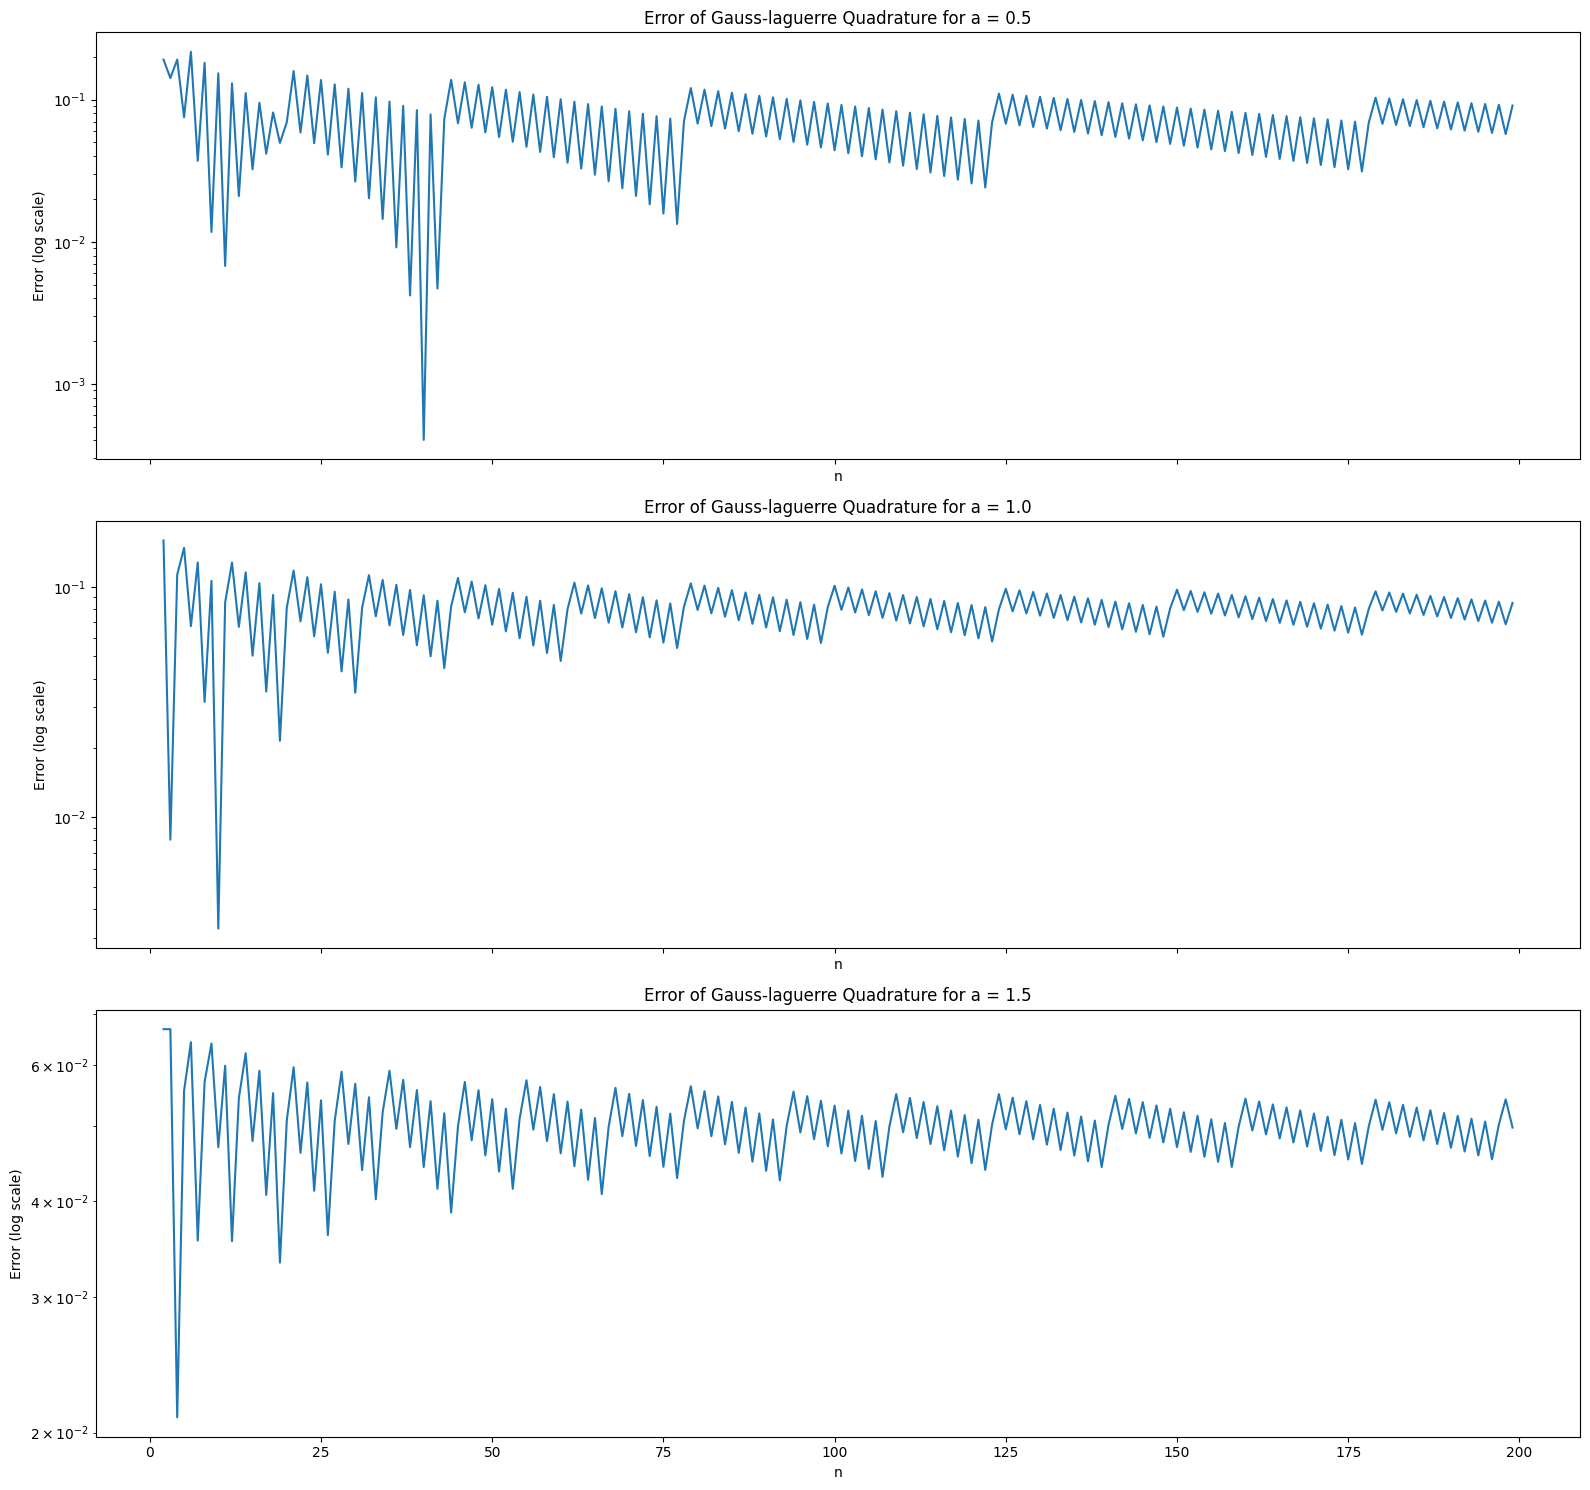

In [51]:
# Function for Gauss-Laguerre Quadrature
def gauss_laguerre_simple(a, n):
    nodes, weights = np.polynomial.laguerre.laggauss(n)
    approximation = np.sum(w for w in weights[nodes <= a]) / np.sqrt(np.pi)
    return approximation

# Plotting
fig, axs = plt.subplots(len(A), figsize=(16, 5*len(A)), sharex=True)

for i, a in enumerate(A):
    gaussian_error_a = []
    for n in N:
        cdf_a = gauss_hermite_simple(a, n)  # Change the function here based on the quadrature rule
        gaussian_error_a.append(np.abs(cdf_a - real_cdf[A.index(a)]))
    
    axs[i].plot(N, gaussian_error_a)
    axs[i].set_title(f'Error of Gauss-laguerre Quadrature for a = {a}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error (log scale)')
    axs[i].set_yscale('log')

plt.tight_layout()
plt.show()

#### Why certain quadrature rules may perform better or worse for specific integration problems ?


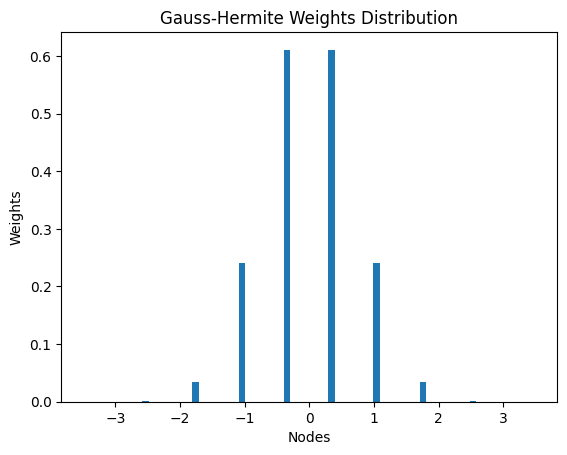

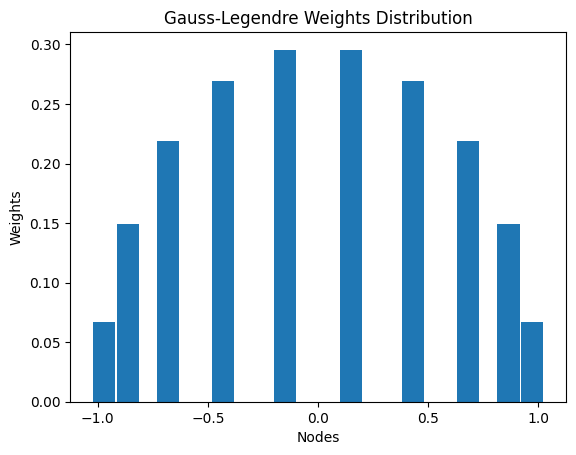

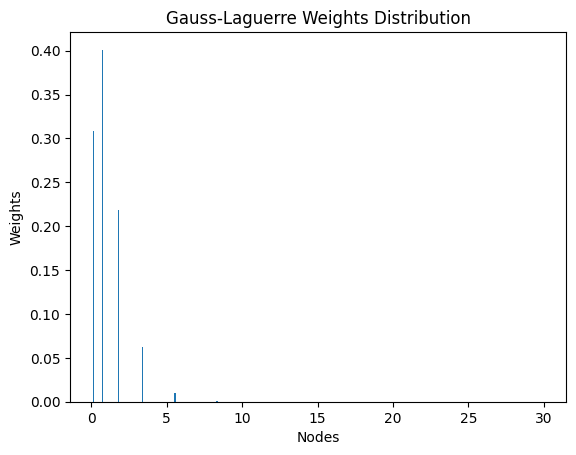

In [53]:


def plot_weights_distribution(nodes, weights, title):
    plt.bar(nodes, weights, width=0.1)
    plt.xlabel('Nodes')
    plt.ylabel('Weights')
    plt.title(title)
    plt.show()

# Compute nodes and weights for each quadrature rule
nodes_hermite, weights_hermite = np.polynomial.hermite.hermgauss(10)  # Gauss-Hermite
nodes_legendre, weights_legendre = roots_legendre(10)  # Gauss-Legendre
nodes_laguerre, weights_laguerre = roots_laguerre(10)  # Gauss-Laguerre

# Plot weights distribution for each quadrature rule
plot_weights_distribution(nodes_hermite, weights_hermite, 'Gauss-Hermite Weights Distribution')
plot_weights_distribution(nodes_legendre, weights_legendre, 'Gauss-Legendre Weights Distribution')
plot_weights_distribution(nodes_laguerre, weights_laguerre, 'Gauss-Laguerre Weights Distribution')


This code plot the distribution of weights for each quadrature rule.we can observe how the weights are distributed and how they are suitable for the integrand's characteristics.

#### Conclusion :

- Gauss-Hermite quadrature is best suited for integrating functions with Gaussian weight functions over the entire real line.
- Gauss-Legendre quadrature is effective for integrating functions over finite intervals with uniform weight functions .
- Gauss-Laguerre quadrature works well for functions with exponential decay over the positive semi-infinite interval .
